In [125]:
import pandas as pd
%matplotlib inline

In [126]:
path = "./../archivos/"
filename = "df.csv"

In [127]:
df = pd.read_csv(path+filename)
df = df[(df["time"]>=0.00) & (df["time"]<=(120000.00+5.00))]

In [128]:
df.describe()

,posX,posY,time,height,width,timestamp
count,7218.000000,7218.000000,7218.000000,7218.000000,7218.000000,7218.000000
mean,662.673594,424.149626,60061.310784,42.150966,42.150966,126490.760183
std,114.923787,85.840289,34655.335800,3.202076,3.202076,34655.979731
min,355.000000,199.000000,0.000000,41.726074,41.726074,66426.000000
25%,571.000000,347.000000,30048.510010,41.726074,41.726074,96478.250000
50%,669.000000,423.000000,60166.510010,41.726074,41.726074,126597.000000
75%,734.000000,505.000000,90036.010010,41.726074,41.726074,156465.750000
max,1069.000000,606.000000,120004.010010,83.452148,83.452148,186435.000000


In [129]:
df.head()

,posX,posY,time,height,width,timestamp
0,624,225,0.00000,41.726074,41.726074,66426.0
1,590,218,15.01001,41.726074,41.726074,66443.0
2,557,217,31.01001,41.726074,41.726074,66459.0
3,530,218,48.01001,41.726074,41.726074,66476.0
4,504,223,65.01001,41.726074,41.726074,66493.0


In [130]:
# start, end, tolerance: float
def split_dataset(dataframe,start,end,tolerance=5.00):
    return dataframe[(dataframe["time"]>=start) & (dataframe["time"]<=(end+tolerance))]

In [135]:
def distance_between_points(x1,y1,x2,y2):  
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [131]:
df = split_dataset(df,0.00,120000.00)

In [243]:
df1 = split_dataset(df,0.00,2000.00)

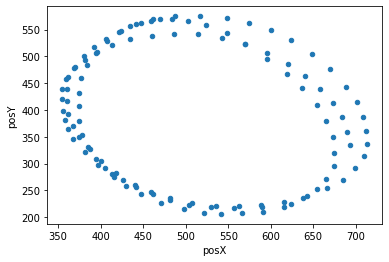

In [244]:
df1.plot.scatter(x="posX", y="posY")

In [136]:
df1.describe()

,posX,posY,time,height,width,timestamp
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,571.510815,396.634775,9999.749602,41.726074,41.726074,76428.212146
std,102.072725,97.952565,5781.828839,0.000000,0.000000,5781.944313
min,355.000000,199.000000,0.000000,41.726074,41.726074,66426.000000
25%,496.000000,314.250000,4999.010010,41.726074,41.726074,71427.250000
50%,568.000000,396.000000,10000.010010,41.726074,41.726074,76428.500000
75%,665.750000,487.000000,15000.760010,41.726074,41.726074,81429.750000
max,747.000000,575.000000,20002.010010,41.726074,41.726074,86431.000000


In [216]:
'''
return Serie with distances between a center point to each point of the given dataframe
'''
def distance_between_points_dataframe(dataframe,centerX,centerY):
    return (((dataframe["posX"] - centerX)**2)+((dataframe["posY"] - centerY)**2)).apply(lambda x: math.sqrt(x))

### Thickness

In [140]:
import math

In [177]:
centerX = (max(df1["posX"]) + min(df1["posX"]))/2
centerY = (max(df1["posY"]) + min(df1["posY"]))/2

In [ ]:
'''
parameters centerX: from reference point (dynamic center)
           centerY: from reference point (dynamic center)
           graph: 0 or 1, 0 (default) if not want to graph

return (graph=0) minimun distance
                 maximun distance
                 thickness value
'''
def thickness(dataframe,centerX,centerY,graph=0):
    dataframe["distances"] = distance_between_points_dataframe(dataframe,centerX,centerY)
    min_distance = min(dataframe["distances"])
    max_distance = max(dataframe["distances"])
    
    # to graph
    if graph:
        serie_min = dataframe[dataframe["distances"] == min_distance]
        serie_max = dataframe[dataframe["distances"] == max_distance]

        return {"min_posX": serie_min["posX"], "min_posY": serie_min["posY"], 
                "max_posX": serie_max["posX"], "max_posY": serie_max["posY"],
                "centerX": centerX, "centerY": centerY}
    
    return {"min_distance": min_distance, "max_distance": max_distance, "thickness": max_distance-min_distance}

### Smoothness

In [197]:
import numpy as np

In [213]:
'''
parameters centerX: from reference point (dynamic center)
           centerY: from reference point (dynamic center)
           
return standar deviation of given array (distances)
'''
def smoothness_with_variance(dataframe,centerX,centerY):
    distance = np.array(distance_between_points_dataframe(dataframe,centerX,centerY))
    return np.std(distance)

In [61]:
df2 = df[(df["time"]>=0.00) & (df["time"]<=(120000.00+5.00))]

In [62]:
df2.describe()

,posX,posY,time,height,width,timestamp
count,7218.000000,7218.000000,7218.000000,7218.000000,7218.000000,7218.000000
mean,662.673594,424.149626,60061.310784,42.150966,42.150966,126490.760183
std,114.923787,85.840289,34655.335800,3.202076,3.202076,34655.979731
min,355.000000,199.000000,0.000000,41.726074,41.726074,66426.000000
25%,571.000000,347.000000,30048.510010,41.726074,41.726074,96478.250000
50%,669.000000,423.000000,60166.510010,41.726074,41.726074,126597.000000
75%,734.000000,505.000000,90036.010010,41.726074,41.726074,156465.750000
max,1069.000000,606.000000,120004.010010,83.452148,83.452148,186435.000000


In [63]:
df2.iloc[0,:]

posX           624.000000
posY           225.000000
time             0.000000
height          41.726074
width           41.726074
timestamp    66426.000000
Name: 0, dtype: float64

In [68]:
df2.head()

,posX,posY,time,height,width,timestamp
0,624,225,0.00000,41.726074,41.726074,66426.0
1,590,218,15.01001,41.726074,41.726074,66443.0
2,557,217,31.01001,41.726074,41.726074,66459.0
3,530,218,48.01001,41.726074,41.726074,66476.0
4,504,223,65.01001,41.726074,41.726074,66493.0


In [111]:
df3 = df[(df["time"]>=0.00) & (df["time"]<=(725.00+5.00))]
df4 =  df[(df["time"]>=725.00) & (df["time"]<=((725.00*2)+5.00))]

In [110]:
diff_time = df3.iloc[-1,2] - df3.iloc[0,2]
diff_time

714.010009765625

In [112]:
diff_time = df4.iloc[-1,2] - df4.iloc[0,2]
diff_time

717.0

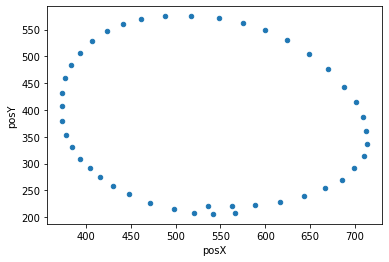

In [113]:
df4.plot.scatter(x="posX", y="posY")

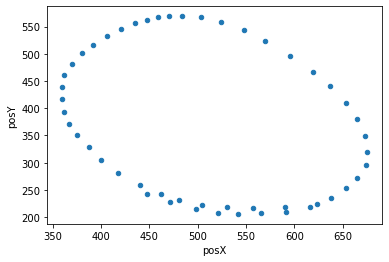

In [417]:
df5 = df.iloc[0:50]
df5.plot.scatter(x="posX", y="posY")

In [261]:
df5.head(1)

,posX,posY,time,height,width,timestamp
0,624,225,0.0,41.726074,41.726074,66426.0


In [262]:
d1 = split_dataset(df,0.00,20000.00)
d2 = split_dataset(df,20000.00,40000.00)
d3 = split_dataset(df,40000.00,60000.00)
d4 = split_dataset(df,60000.00,80000.00)
d5 = split_dataset(df,80000.00,100000.00)
d6 = split_dataset(df,100000.00,120000.00)

In [284]:
np.array(distance_between_points_dataframe(df5,df5.iloc[0,0],df5.iloc[0,1]))

array([  0.        ,  34.71310992,  67.47592163,  94.26027795,
       120.01666551, 143.17122616, 162.99693249, 187.29922584,
       213.74049686, 237.85709996, 258.41439588, 278.61442892,
       295.57570942, 311.23624468, 326.43529221, 339.84113936,
       352.61877432, 360.62723136, 368.39109653, 372.94503616,
       376.52755543, 379.8025803 , 381.15875957, 381.07741996,
       379.72226693, 376.89786415, 371.39736133, 362.77403435,
       347.69095473, 327.92834583, 303.83712742, 272.44265452,
       242.05164738, 216.39085008, 187.41664814, 160.33090781,
       133.33041663, 107.82393055,  86.02325267,  62.36986452,
        41.03656906,  17.20465053,  10.        ,  36.24913792])

In [409]:
'''
return average time to achieve a full circle 
'''
def completed_circle_average(dataframe):
    dic = n_complete_circles_timelapse(dataframe)
    
    total_time = dataframe["time"].iloc[-1] - dataframe["time"].iloc[0]
    
    return (total_time/dic["n_circles"])/1000

In [421]:
'''
return average number of points captured when a full circle is achieved
'''
def n_points_per_circle_average(dataframe):
    dic = n_complete_circles_timelapse(dataframe)
    
    return len(dataframe)/dic["n_circles"]

In [423]:
n_points_per_circle_average(df)

35.556650246305416

In [414]:
'''
return number of circles in the given dataframe
       index of cut, when a circle is completed
'''
def n_complete_circles_timelapse(dataframe):
    number = 0
    change = 1
    stop_criteria = 0
    counter = 0
    cuts = []
    distances = np.array(distance_between_points_dataframe(dataframe,
                                                           dataframe.iloc[0,0],
                                                           dataframe.iloc[0,1]))
    for distance in distances:
        counter += 1
        local_change = change
        if distance>number:
            change = 1
        elif distance<number:
            change = 0
        number = distance
        
        if local_change != change:
            stop_criteria +=1
            try:
                distances = np.array(distance_between_points_dataframe(dataframe.iloc[counter:,:],
                                                                   dataframe.iloc[counter,0],
                                                                   dataframe.iloc[counter,1]))
            except:
                break
        
        if (stop_criteria%2 == 0) and (stop_criteria!=0) and (local_change != change):
            cuts.append(counter)
    return {"n_circles": len(cuts), "indexes":cuts}

In [419]:
n_complete_circles_timelapse(df5)

{'n_circles': 1, 'indexes': [44]}

In [361]:
complete_circle(df5)

True True
[44]


In [256]:
df4.describe()

,posX,posY,time,height,width,timestamp
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,531.045455,375.931818,1088.964555,41.726074,41.726074,67517.136364
std,120.268876,131.524761,214.098972,0.000000,0.000000,213.980611
min,374.000000,206.000000,730.010010,41.726074,41.726074,67159.000000
25%,413.750000,251.250000,910.760010,41.726074,41.726074,67338.000000
50%,528.500000,357.500000,1089.010010,41.726074,41.726074,67517.500000
75%,644.500000,504.750000,1268.260010,41.726074,41.726074,67696.250000
max,713.000000,575.000000,1447.010010,41.726074,41.726074,67875.000000


In [116]:
num = 10
vueltas = df3[((df3["posX"]<=df3.iloc[0,0]+num) & (df3["posX"]>=df3.iloc[0,0]-num)) & ((df3["posY"]<=df3.iloc[0,1]+num) & (df3["posX"]>=df3.iloc[0,1]-num))]
vueltas

,posX,posY,time,height,width,timestamp
0,624,225,0.00000,41.726074,41.726074,66426.0
42,616,219,698.01001,41.726074,41.726074,67126.0


# ///////////////////////////////

In [4]:
num_dif = pd.read_csv(path+"numerico_dificil.tsv",sep="\t")
num_fac = pd.read_csv(path+"numerico_facil.tsv",sep="\t")
sec_dif = pd.read_csv(path+"secuencia_dificil.tsv",sep="\t")
sec_fac = pd.read_csv(path+"secuencia_facil.tsv",sep="\t")
sec_fac_v2 = pd.read_csv(path+"secuencia_facil_2.tsv",sep="\t")

In [10]:
# num_dif.head()
# num_fac.head()
# sec_dif.head()
# sec_fac.head()
sec_fac_v2.head()

,posX,posY,pressure,movementX,movementY,time
0,732.134766,510.842834,0.066667,0,0,-2210.5
1,722.679138,498.676727,0.066667,-7,-9,-1866.7
2,707.820312,477.048126,0.066667,-11,-16,-1850.0
3,647.034241,424.328339,0.066667,-45,-39,-1809.0
4,614.614929,404.051483,0.066667,-24,-15,-1791.5


In [19]:
data = num_dif
#del data["pressure"]
data.describe()

,posX,posY,movementX,movementY,time
count,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000
mean,468.354497,765.205053,-0.224640,0.783133,51262.514147
std,149.197939,207.378753,48.350474,67.465454,26325.301289
min,133.729416,314.833435,-149.000000,-190.000000,0.000000
25%,337.700531,581.135864,-38.000000,-48.000000,26318.300000
50%,470.079132,774.441650,-1.000000,3.000000,48467.900000
75%,597.054565,939.359863,37.000000,51.000000,69934.400000
max,971.226746,1612.550903,250.000000,305.000000,119988.800000
